In [1]:
%matplotlib inline
from matplotlib.pyplot import imshow

In [3]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img

import numpy as np

from IPython.display import Image

In [4]:
base = InceptionV3(include_top=True, weights='imagenet',)

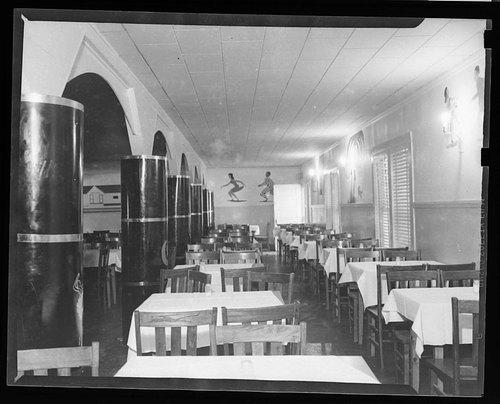

In [5]:
test_image_path = 'data/images/NMAAHC-HCA_21_03_B.jpg'
#test_image_path = 'data/images/NMAAHC-HCA_11_21_C.jpg'
Image(test_image_path)

In [6]:
test_image = load_img(test_image_path)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


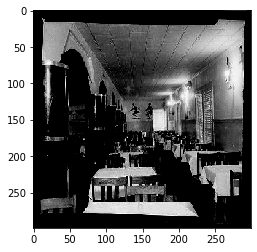

In [7]:
im = preprocess_input(img_to_array(test_image.resize((299,299))))
imshow(im)

In [8]:
preds = base.predict(np.expand_dims(im, 0))

In [9]:
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n04081281', 'restaurant', 0.89386487), ('n02791270', 'barbershop', 0.018981788), ('n03028079', 'church', 0.005871877)]


In [10]:
prediction = {}
for idx, pred in enumerate(decode_predictions(preds, top=3)[0]):
    wordnet_id, label, confidence = pred
    prediction['label_'+str(idx+1)] = label
    prediction['confidence_'+str(idx+1)] = confidence
prediction

{'label_1': 'restaurant',
 'confidence_1': 0.89386487,
 'label_2': 'barbershop',
 'confidence_2': 0.018981788,
 'label_3': 'church',
 'confidence_3': 0.005871877}